In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Proyecto de Analítica Descriptiva**

Jaime Yerovi

In [2]:

data = pd.read_csv('/kaggle/input/mineduc/2_MINEDUC_RegistrosAdministrativos_2015-2016Inicio.csv', delimiter=';')
data1 = pd.read_csv('/kaggle/input/mineduc/2_MINEDUC_RegistrosAdministrativos_2016-2017_Inicio.csv', delimiter=';')
data2 = pd.read_csv('/kaggle/input/mineduc/2_MINEDUC_RegistrosAdministrativos_2017-2018Inicio.csv', delimiter=';')


Objetivo: Validar que sectores tienen el índice mas alto de abandono estudiantil.

Aqui tratamos todos los datos para realizar los calculos y creamos un diccionario de datos para tener los graficos correctos.

Y presentamos los datos en una grafica que se van a evaluar.

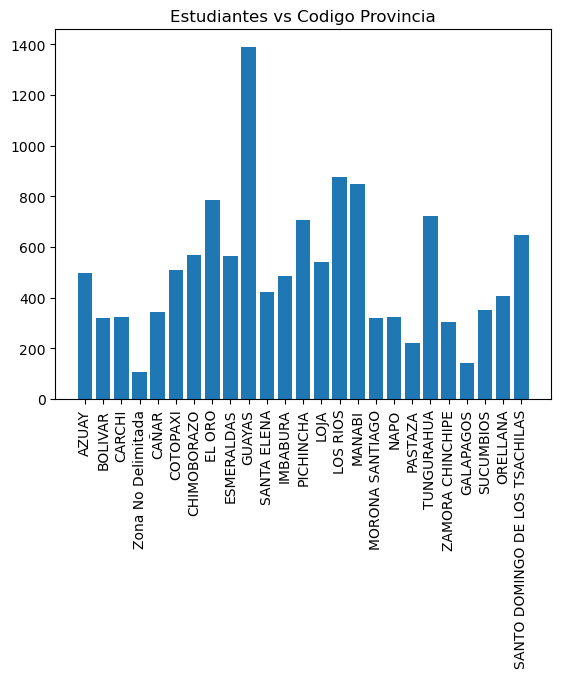

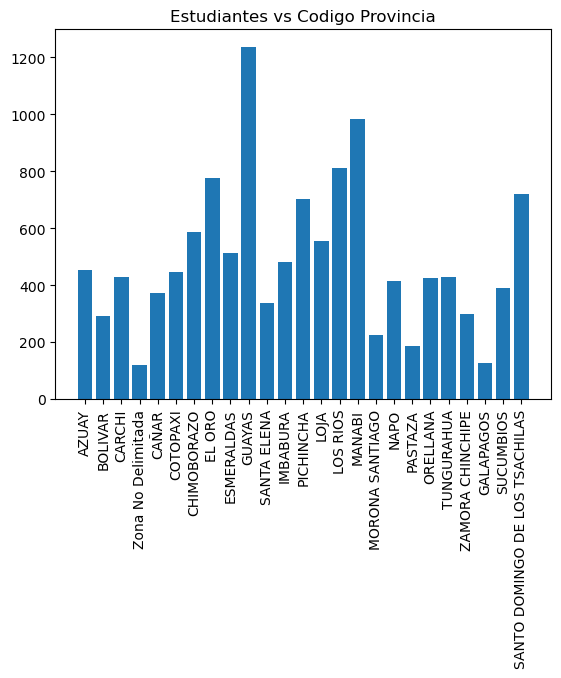

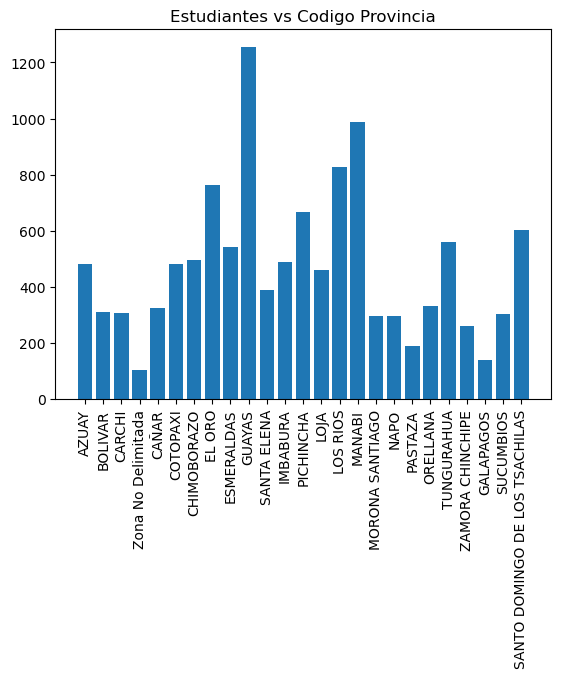

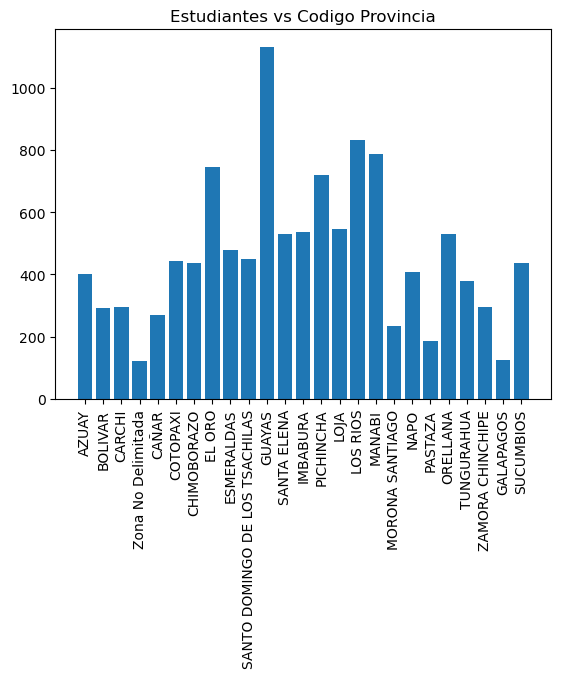

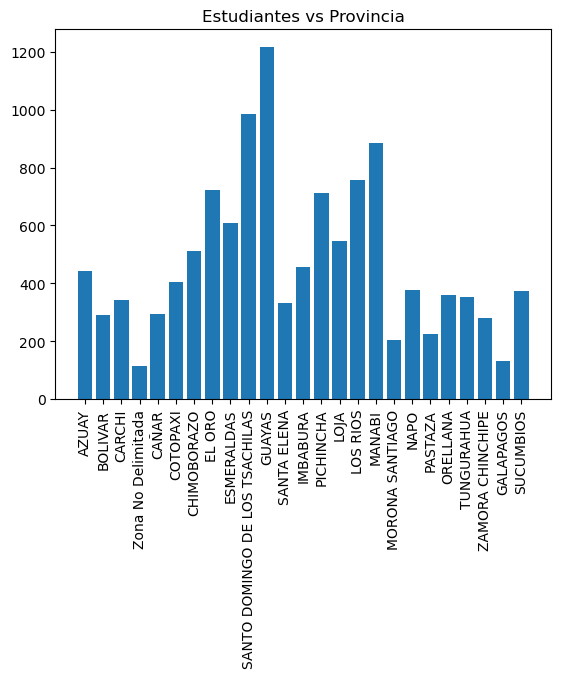

In [41]:
map_dictionary ={1 : "AZUAY", 2 :"BOLIVAR", 3 : "CARCHI",4:"CAÑAR",5:"COTOPAXI",6 : "CHIMOBORAZO",
                7 : "EL ORO",8 : "ESMERALDAS",9 : "GUAYAS",10 : "IMBABURA",11 : "LOJA",12 : "LOS RIOS",13 : "MANABI",
                14 : "MORONA SANTIAGO",15 : "NAPO",16 : "PASTAZA",17 : "PICHINCHA",18 : "TUNGURAHUA",19 : "ZAMORA CHINCHIPE",20 : "GALAPAGOS",
                21 : "SUCUMBIOS",22 : "ORELLANA",23 : "SANTO DOMINGO DE LOS TSACHILAS",24 : "SANTA ELENA",90 : "Zona No Delimitada"} 

data['Nprovincia'] = data['Cod_Provincia'].map(map_dictionary) 
data1['Nprovincia'] = data1['Cod_Provincia'].map(map_dictionary) 
data2['Nprovincia'] = data2['Cod_Provincia'].map(map_dictionary) 

data = data.dropna(how='all')
data1 = data1.dropna(how='all')
data2 = data2.dropna(how='all')

x= data['Nprovincia']

y= data['EstudiantesMasculinoSegundoAñoBACH'] + data['EstudiantesFemeninoSegundoAñoBACH']

plt.bar(x,y)
plt.title('Estudiantes vs Codigo Provincia') 
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

x1= data1['Nprovincia']

y1= data1['EstudiantesMasculinoSegundoAñoBACH'] + data1['EstudiantesFemeninoSegundoAñoBACH']

plt.bar(x1,y1)
plt.title('Estudiantes vs Codigo Provincia') 
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

x1= data1['Nprovincia']

y1= data1['EstudiantesMasculinoTercerAñoBACH'] + data1['EstudiantesFemeninoTercerAñoBACH']

plt.bar(x1,y1)
plt.title('Estudiantes vs Codigo Provincia') 
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

x2= data2['Nprovincia']

y2= data2['EstudiantesMasculinoSegundoAñoBACH'] + data2['EstudiantesFemeninoSegundoAñoBACH']

plt.bar(x2,y2)
plt.title('Estudiantes vs Codigo Provincia') 
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

x2= data2['Nprovincia']

y2= data2['EstudiantesMasculinoTercerAñoBACH'] + data2['EstudiantesFemeninoTercerAñoBACH']

plt.bar(x2,y2)
plt.title('Estudiantes vs Provincia') 
plt.tick_params(axis='x', labelrotation = 90)
plt.show()

Objetivos a cumplir:

1. Validar que sectores tienen el índice mas alto de abandono estudiantil
1. Validar si los sectores mas afectados tienen causales como localización o infraestructura
1. Analizar el numero de abandono estudiantil dentro de las poblaciones rurales

Presentamos los datos y los operamos despues de agruparlos

**Validar que sectores tienen el índice mas alto de abandono estudiantil**

In [50]:
#2015
aggregations = {
    'EstudiantesMasculinoSegundoAñoBACH': 'sum',
    'EstudiantesFemeninoSegundoAñoBACH': 'sum'
}

#2016
aggregations1 = {
    'EstudiantesMasculinoSegundoAñoBACH': 'sum',
    'EstudiantesFemeninoSegundoAñoBACH': 'sum',
    'EstudiantesMasculinoTercerAñoBACH': 'sum',
    'EstudiantesFemeninoTercerAñoBACH': 'sum'
}

#2017
aggregations2 = {

    'EstudiantesMasculinoTercerAñoBACH': 'sum',
    'EstudiantesFemeninoTercerAñoBACH': 'sum'
}

dataProvincia = data.groupby('Nprovincia').agg(aggregations)

dataProvincia1 = data1.groupby('Nprovincia').agg(aggregations1)

dataProvincia2 = data2.groupby('Nprovincia').agg(aggregations2)

#calculamos los estudiantes que no volvieron a las aulas por provincia que representaria el abandono escolar

diferencia = dataProvincia['EstudiantesMasculinoSegundoAñoBACH'] -dataProvincia1['EstudiantesMasculinoTercerAñoBACH']

print(diferencia)

diferencia1 = dataProvincia1['EstudiantesMasculinoSegundoAñoBACH'] -dataProvincia2['EstudiantesMasculinoTercerAñoBACH']

print(diferencia1)

Nprovincia
AZUAY                              703.0
BOLIVAR                            100.0
CARCHI                             155.0
CAÑAR                              117.0
CHIMOBORAZO                        421.0
COTOPAXI                           410.0
EL ORO                             403.0
ESMERALDAS                         240.0
GALAPAGOS                           38.0
GUAYAS                            1310.0
IMBABURA                           310.0
LOJA                               364.0
LOS RIOS                           305.0
MANABI                             861.0
MORONA SANTIAGO                    265.0
NAPO                               241.0
ORELLANA                           230.0
PASTAZA                            123.0
PICHINCHA                         2504.0
SANTA ELENA                        200.0
SANTO DOMINGO DE LOS TSACHILAS     293.0
SUCUMBIOS                          241.0
TUNGURAHUA                         567.0
ZAMORA CHINCHIPE                   154.0
Zona 

**Validar si los sectores mas afectados tienen causales como localización o infraestructura**

In [54]:
dataProvinciaArea = data.groupby(['Nprovincia','Area','Tenencia_Inmueble_Edificio']).agg(aggregations)

dataProvinciaArea1 = data1.groupby(['Nprovincia','Area','Tenencia_Inmueble_Edificio']).agg(aggregations1)

dataProvinciaArea2 = data2.groupby(['Nprovincia','Area','Tenencia_Inmueble_Edificio']).agg(aggregations2)

#Calculamos ahora las diferencia con respecto a la ruralidad y la infraestructura

diferenciaRuralidad = dataProvinciaArea['EstudiantesMasculinoSegundoAñoBACH'] -dataProvinciaArea1['EstudiantesMasculinoTercerAñoBACH']

print(diferenciaRuralidad)

diferenciaRuralidad1 = dataProvinciaArea1['EstudiantesMasculinoSegundoAñoBACH'] -dataProvinciaArea2['EstudiantesMasculinoTercerAñoBACH']

print(diferenciaRuralidad1)

Nprovincia          Area       Tenencia_Inmueble_Edificio
AZUAY               RuralINEC  Arriendo                      18.0
                               Comodato                      14.0
                               Invasión                       0.0
                               No conoce                      NaN
                               Prestado                      -7.0
                                                             ... 
Zona No Delimitada  RuralINEC  Cesión de derechos             0.0
                               Comodato                       0.0
                               No conoce                      0.0
                               Prestado                       1.0
                               Propio                         9.0
Length: 266, dtype: float64
Nprovincia          Area       Tenencia_Inmueble_Edificio
AZUAY               RuralINEC  Arriendo                      10.0
                               Comodato                      -2.

**Analizar el numero de abandono estudiantil dentro de las poblaciones rurales y urbanas**

In [64]:
dataProvinciaRural = data.groupby(['Area']).agg(aggregations)

dataProvinciaRural1 = data1.groupby(['Area']).agg(aggregations1)

dataProvinciaRural2 = data2.groupby(['Area']).agg(aggregations2)

#Calculamos ahora las diferencia con respecto a la ruralidad y la infraestructura

diferenciaRural = dataProvinciaRural['EstudiantesMasculinoSegundoAñoBACH'] -dataProvinciaRural1['EstudiantesMasculinoTercerAñoBACH']

print(diferenciaRural)

diferenciaRural1 = dataProvinciaRural1['EstudiantesMasculinoSegundoAñoBACH'] -dataProvinciaRural2['EstudiantesMasculinoTercerAñoBACH']

print(diferenciaRural1)

Area
RuralINEC     120856.0
UrbanaINEC         NaN
dtype: float64
Area
RuralINEC     1951
UrbanaINEC    9141
dtype: int64
